In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_gaussian_quantiles

In [2]:
# Generate challenging dataset with Gaussian quantiles (concentric classes,higher covariance = more overlap)
X, y = make_gaussian_quantiles(n_samples=1000, 
            n_features=2, n_classes=2, cov=3.0, random_state=808)

# Introduce additional noise by flipping some labels (0s,1s)(simulating label errors)
flip_mask = np.random.rand(len(y)) < 0.15  
y[flip_mask] = 1 - y[flip_mask]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

In [3]:
# Set up SVM with RBF kernel and hyperparameter tuning 
param_grid_svm = {'C': np.logspace(-2, 2, 10)} #defining grid for readability and reusability
grid_search_svm = GridSearchCV(SVC(kernel='rbf', random_state=808), param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Best SVM model
best_svm = grid_search_svm.best_estimator_
y_train_pred_svm = best_svm.predict(X_train)
y_test_pred_svm = best_svm.predict(X_test)


In [4]:
best_svm

SVC(C=0.027825594022071243, random_state=808)

In [5]:
# Train a Random Forest model with hyperparameter tuning
param_grid_rf = {'n_estimators': [10, 50, 100, 200], 'max_depth': [2, 5, 10, None]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=808), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=808),
             param_grid={'max_depth': [2, 5, 10, None],
                         'n_estimators': [10, 50, 100, 200]})

In [6]:
# Best RF model
best_rf = grid_search_rf.best_estimator_
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

In [7]:
# Compute accuracy for both models
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

# Print accuracy comparison
print(f"SVM Train Accuracy: {train_acc_svm:.2f}, Test Accuracy: {test_acc_svm:.2f}")
print(f"RF Train Accuracy: {train_acc_rf:.2f}, Test Accuracy: {test_acc_rf:.2f}")

SVM Train Accuracy: 0.86, Test Accuracy: 0.85
RF Train Accuracy: 0.86, Test Accuracy: 0.82


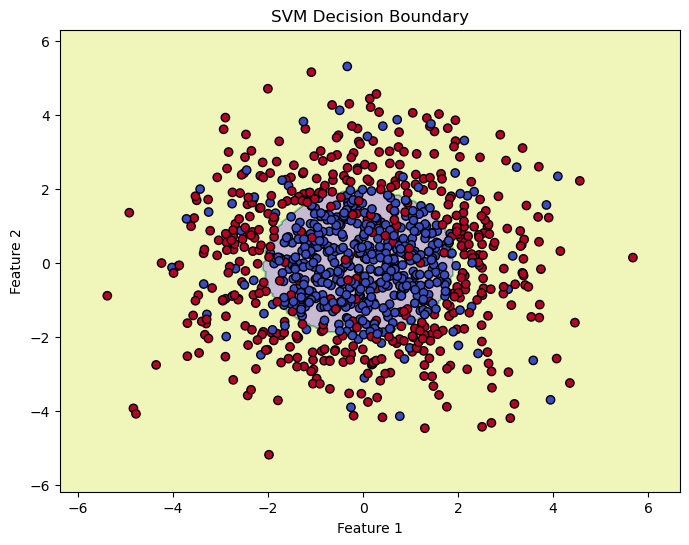

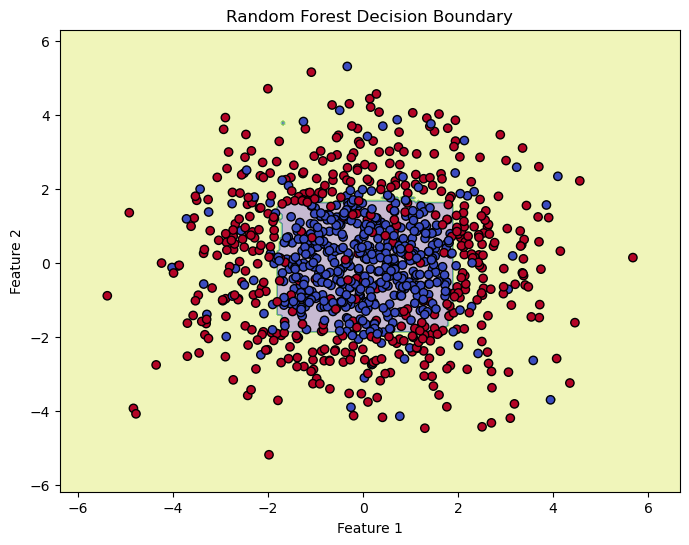

In [8]:
# Function to visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.05  # Step size in the mesh
    
    # Define the range for plotting based on feature values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Expand slightly beyond min/max
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a meshgrid (a grid of (x, y) coordinates to cover the plot area)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # Flatten meshgrid & predict
    
    # Reshape predictions to match the grid shape for contour plotting
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Visualize decision boundaries
plot_decision_boundary(best_svm, X, y, "SVM Decision Boundary")
plot_decision_boundary(best_rf, X, y, "Random Forest Decision Boundary")

### Effect of C parameter on overfitting

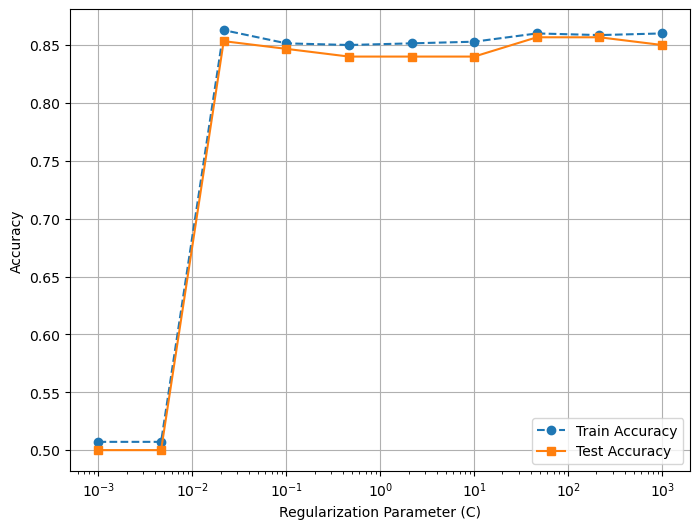

In [9]:
# Test different values of C in SVM with an RBF kernel
C_values = np.logspace(-3, 3, 10)  # Log-spaced C values
train_scores_svm = []
test_scores_svm = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C, random_state=808)
    svm.fit(X_train, y_train)
    
    # Compute train and test accuracy
    train_scores_svm.append(accuracy_score(y_train, svm.predict(X_train)))
    test_scores_svm.append(accuracy_score(y_test, svm.predict(X_test)))

# Plot Learning Curve: Training vs. Test Accuracy
plt.figure(figsize=(8,6))
plt.plot(C_values, train_scores_svm, marker='o', linestyle='--', label="Train Accuracy")
plt.plot(C_values, test_scores_svm, marker='s', label="Test Accuracy")
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")
#plt.title("SVM: Effect of C on Overfitting")
plt.legend()
plt.grid(True)
plt.show()
